# Week 2 Homework

***Due (pushed to your GitHub branch) on 9/27 by 11:59 pm***

Retrieve and decompress the genome.

In [1]:
!mkdir c_elegans_genome
%cd c_elegans_genome
!wget -nc -O c_elegans_genome.fa.gz https://downloads.wormbase.org/species/c_elegans/sequence/genomic/c_elegans.PRJNA275000.current.genomic.fa.gz
!gzip -d -f c_elegans_genome.fa.gz

mkdir: cannot create directory ‘c_elegans_genome’: File exists
/data/users/willetse0745/BIOL343/2_genome_exploration/c_elegans_genome
--2024-10-03 15:32:29--  https://downloads.wormbase.org/species/c_elegans/sequence/genomic/c_elegans.PRJNA275000.current.genomic.fa.gz
Resolving downloads.wormbase.org (downloads.wormbase.org)... 50.19.229.229
Connecting to downloads.wormbase.org (downloads.wormbase.org)|50.19.229.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28610932 (27M) [application/x-gzip]
Saving to: ‘c_elegans_genome.fa.gz’

c_elegans_genome.fa 100%[===================>]  27.29M  35.8MB/s    in 0.8s    

2024-10-03 15:32:30 (35.8 MB/s) - ‘c_elegans_genome.fa.gz’ saved [28610932/28610932]



Retrieve and decompress the annotations.

In [2]:
!wget -O - https://ftp.ebi.ac.uk/pub/databases/wormbase/parasite/releases/WBPS19/species/caenorhabditis_elegans/PRJNA13758/caenorhabditis_elegans.PRJNA13758.WBPS19.canonical_geneset.gtf.gz | \
    gzip -f -d > c_elegans_annotations.gtf

--2024-10-03 15:32:31--  https://ftp.ebi.ac.uk/pub/databases/wormbase/parasite/releases/WBPS19/species/caenorhabditis_elegans/PRJNA13758/caenorhabditis_elegans.PRJNA13758.WBPS19.canonical_geneset.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8521242 (8.1M) [application/x-gzip]
Saving to: ‘STDOUT’

-                   100%[===================>]   8.13M   597KB/s    in 14s     

2024-10-03 15:32:46 (595 KB/s) - written to stdout [8521242/8521242]



Count the number of contigs/chromosomes using a single `grep` command. The command should return an integer.

In [3]:
!grep -c ">" c_elegans_genome.fa

7


List the name of each contig/chromosome, which is included in the header of each sequence. Your `grep` command should return the entire header of each entry, with a new line separating entries.

In [4]:
!grep ">" c_elegans_genome.fa

>V length=20182852
>X length=17537347
>IV length=17183857
>I length=14890789
>II length=14885952
>III length=13596826
>MtDNA length=13793


Using piped command line tools, list the feature types in the annotations file with the tally of each feature printed next to it.

In [6]:
!cut -f 3 c_elegans_annotations.gtf | sort | uniq -c 

 217118 CDS
 264559 exon
  27493 five_prime_utr
  46927 gene
      1 #!genebuild-version WS290
  31995 start_codon
  32041 stop_codon
  26375 three_prime_utr
  60140 transcript


Select a gene of interest.

*Gene of interest:* Y38C1AB.8a.1

Using piped command line tools, count the number of exons in your gene of interest.

In [7]:
!grep 'Y38C1AB.8a.1' c_elegans_annotations.gtf | cut -f 3 | grep 'exon' | uniq -c

     21 exon


*Copy/paste a screenshot of your gene of interest shown in JBrowse2*:

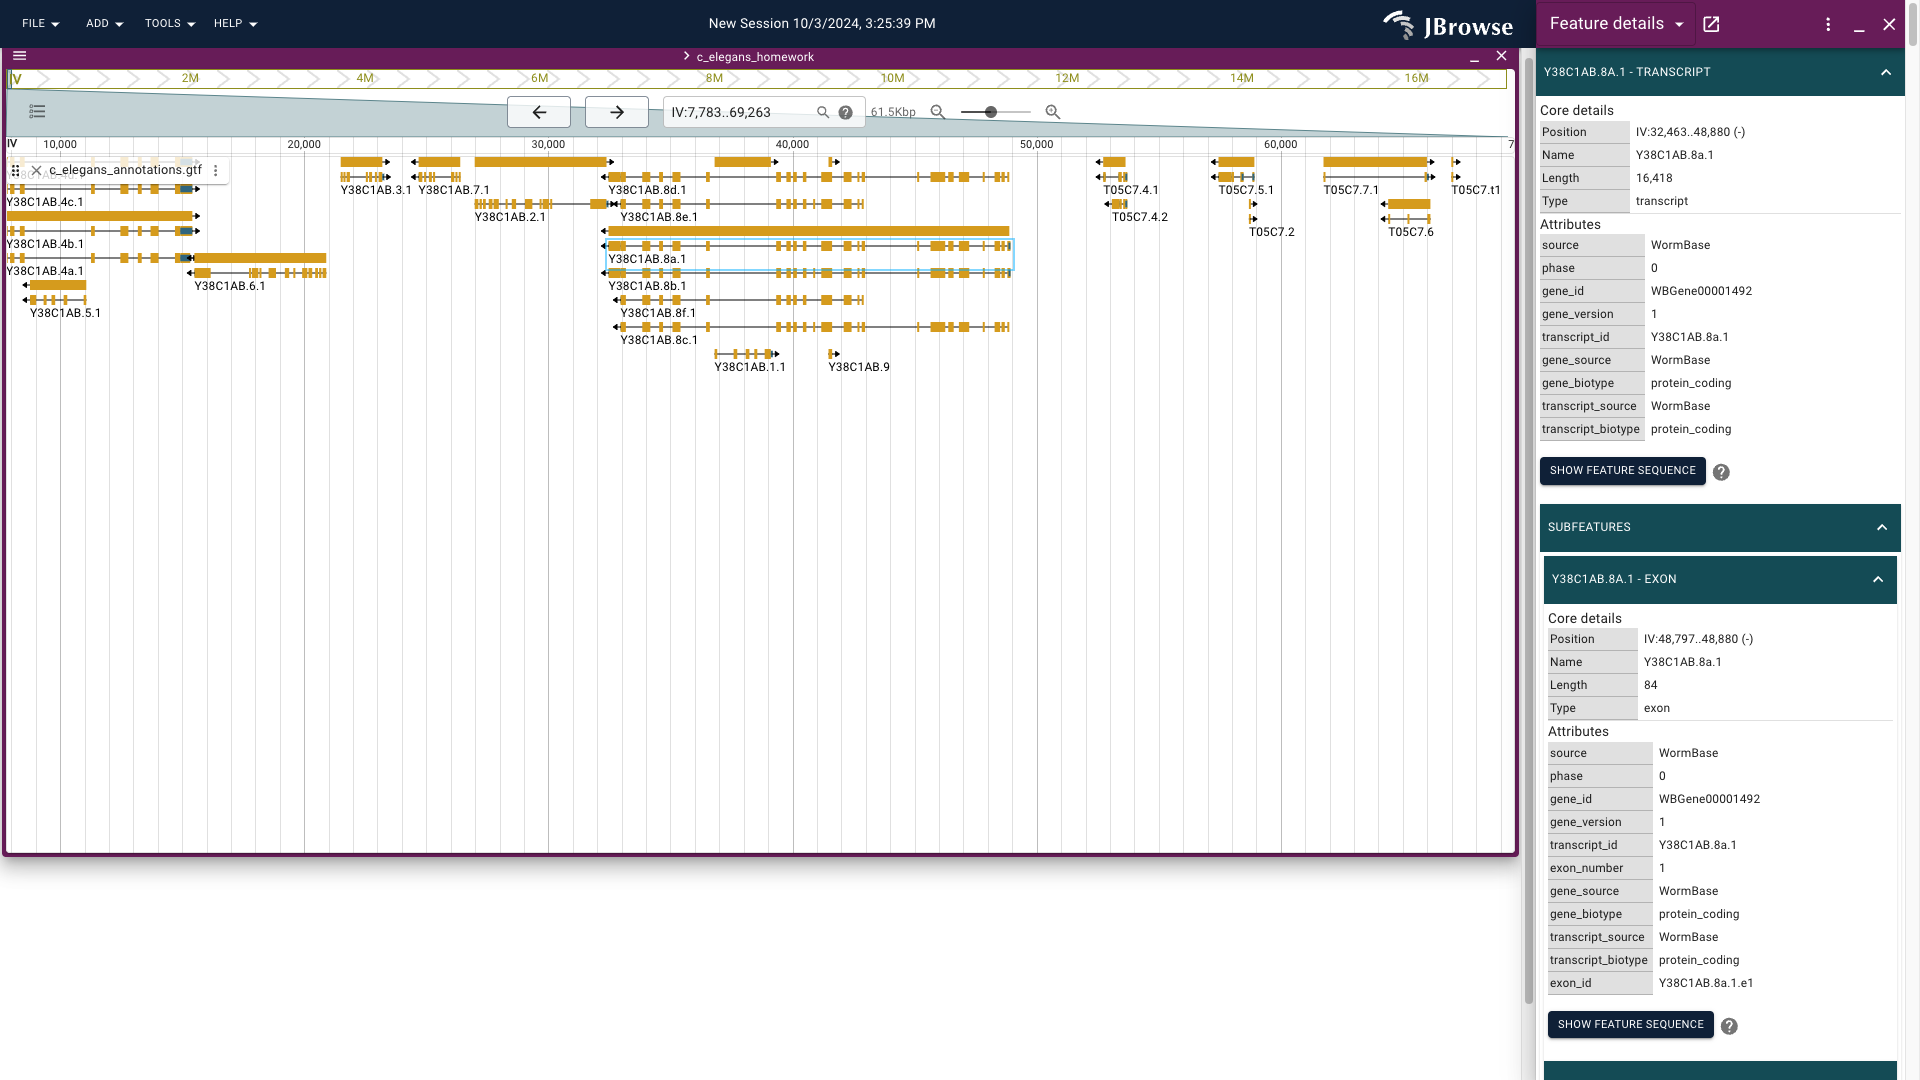

In [8]:
!samtools faidx c_elegans_genome.fa